# Non-Negative Componente (NMF)
Greatly inspired by this [sklearn example](https://scikit-learn.org/stable/auto_examples/decomposition/plot_faces_decomposition.html)

In [1]:
import numpy as np
from skimage import color
import matplotlib.pyplot as plt
from sklearn import decomposition

import sys
sys.path.append('..')
from src.features.serialization import load_features

Read data and turn into numpy array of 0 to 1 floats

In [2]:
df = load_features()

imgs = np.stack(df["image"][:1000]) # <- currently limiting data arbitrarily because full data takes up 22GB as 64-bit floats
imgs = imgs / 255
faces = color.rgb2gray(imgs)
image_shape = faces.shape[1:]
faces = faces.reshape(faces.shape[0], -1)
faces.shape

(1000, 40000)

In [3]:
n_row, n_col = 4, 5

In [4]:
def plot_gallery(title, images, n_col=n_col, n_row=n_row, cmap=plt.cm.gray):
    plt.figure(figsize=(2.0 * n_col, 2.26 * n_row))
    plt.suptitle(title, size=16)
    for i, comp in enumerate(images):
        plt.subplot(n_row, n_col, i + 1)
        vmax = max(comp.max(), -comp.min())
        plt.imshow(
            comp.reshape(image_shape),
            cmap=cmap,
            interpolation="nearest",
            vmin=-vmax,
            vmax=vmax,
        )
        plt.xticks(())
        plt.yticks(())
    plt.subplots_adjust(0.01, 0.05, 0.99, 0.93, 0.04, 0.0)

Extracting the top 20 Components - Non-Negative Componente (NMF)...


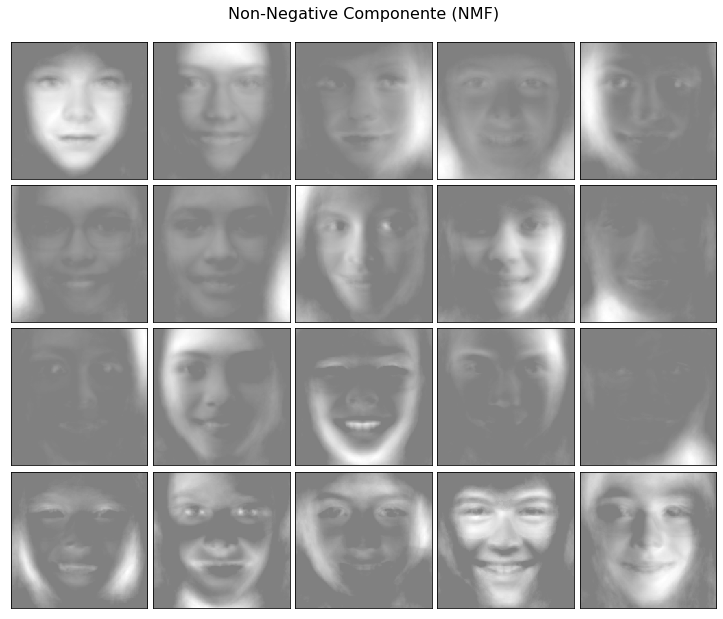

In [7]:
n_components = n_row * n_col
name = 'Non-Negative Componente (NMF)'

print("Extracting the top %d Components - %s..." % (n_components, name))
data = faces.tolist()
estimator = decomposition.NMF(n_components=n_components, init="nndsvda", tol=5e-3)
estimator.fit(data)

if hasattr(estimator, "cluster_centers_"):
    components_ = estimator.cluster_centers_
else:
    components_ = estimator.components_
# Plot an image representing the pixelwise variance provided by the
# estimator e.g its noise_variance_ attribute. The Eigenfaces estimator,
# via the PCA decomposition, also provides a scalar noise_variance_
# (the mean of pixelwise variance) that cannot be displayed as an image
# so we skip it.
if (
    hasattr(estimator, "noise_variance_") and estimator.noise_variance_.ndim > 0
):  # Skip the Eigenfaces case
    plot_gallery(
        "Pixelwise variance",
        estimator.noise_variance_.reshape(1, -1),
        n_col=1,
        n_row=1,
    )
plot_gallery(
    name, components_[:n_components]
)
plt.show()